In [2]:
# Main
import numpy as np
import pandas as pd
from pathlib import Path

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

# Own module
%load_ext autoreload
%autoreload 2
from config import CONFIG

# Data Prep
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold



## Load Data

In [3]:
data_path = CONFIG.data_path / 'raw' / 'creditcard.csv'

data = pd.read_csv(str(data_path))

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing values

### Separating Attributes and Target

In [10]:
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()

## Feature Engineering  

In [11]:
# Scaling
featureToScale = dataX.drop(['Time'], axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:, featureToScale] = sX.fit_transform(dataX[featureToScale])

In [12]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.881566e-18,-1.277349e-17,-4.790058e-17,-1.955940e-17,3.832046e-17,9.979288e-18,1.476935e-17,3.293165e-18,9.979288e-20,...,-7.035398e-18,-4.989644e-19,2.794201e-18,9.380530e-18,1.117680e-17,-5.109395e-17,7.946008e-18,1.234937e-18,-6.336848e-18,2.913952e-17
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [13]:
correlationMatrix = pd.DataFrame(data=[], index=dataX.columns, columns=dataX.columns)
dataX.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596
V1,0.117396,1.000000e+00,5.958899e-16,8.406447e-16,2.030312e-16,-5.622598e-17,-9.889250e-17,3.140612e-16,1.546678e-16,-4.245425e-16,...,2.476841e-16,-9.644012e-17,7.538845e-18,1.304785e-15,3.515720e-17,9.964874e-16,-4.942379e-17,4.190368e-17,8.706997e-16,-0.227709
V2,-0.010593,5.958899e-16,1.000000e+00,1.662837e-16,-4.268155e-17,1.801092e-16,-6.481079e-18,1.938954e-17,-4.733877e-16,-1.530437e-16,...,-4.997572e-16,-2.434824e-16,9.937319e-17,2.649087e-17,-2.913417e-16,1.062846e-16,4.619613e-16,-5.469103e-16,-1.034493e-16,-0.531409
V3,-0.419618,8.406447e-16,1.662837e-16,1.000000e+00,-2.901732e-16,-5.211367e-16,1.374125e-15,-1.617237e-16,1.446554e-16,1.496828e-15,...,-5.260205e-17,-2.006376e-16,-1.774430e-15,-7.753750e-17,-9.766348e-17,3.494992e-16,-2.972502e-16,3.028233e-17,9.911989e-16,-0.210880
V4,-0.105260,2.030312e-16,-4.268155e-17,-2.901732e-16,1.000000e+00,-1.710102e-15,-4.425989e-16,-4.033129e-16,6.486820e-16,5.867070e-16,...,-4.369559e-16,-8.862494e-17,1.316861e-16,1.483112e-16,1.726648e-16,6.079312e-16,-2.966304e-16,1.317007e-16,-1.400303e-17,0.098732
V5,0.173072,-5.622598e-17,1.801092e-16,-5.211367e-16,-1.710102e-15,1.000000e+00,6.938836e-16,-3.742581e-16,8.830491e-16,7.644322e-16,...,-6.004984e-16,3.504276e-16,-3.513581e-16,5.263189e-16,-1.001314e-15,-1.005329e-15,5.525079e-16,6.162919e-16,-2.812050e-16,-0.386356
V6,-0.063016,-9.889250e-17,-6.481079e-18,1.374125e-15,-4.425989e-16,6.938836e-16,1.000000e+00,-6.055728e-16,-4.885981e-16,-6.427929e-16,...,1.545297e-16,-1.904840e-16,-3.246907e-16,2.485499e-16,-1.041208e-15,9.472948e-16,-3.004802e-16,1.235723e-16,3.143391e-16,0.215981
V7,0.084714,3.140612e-16,1.938954e-17,-1.617237e-16,-4.033129e-16,-3.742581e-16,-6.055728e-16,1.000000e+00,-4.781716e-17,4.580789e-16,...,6.485905e-16,-4.680851e-17,-1.085478e-15,-7.109615e-16,-2.241847e-17,-1.135843e-15,-8.173052e-16,4.661644e-16,1.499168e-16,0.397311
V8,-0.036949,1.546678e-16,-4.733877e-16,1.446554e-16,6.486820e-16,8.830491e-16,-4.885981e-16,-4.781716e-17,1.000000e+00,5.905712e-16,...,2.534329e-16,-1.757851e-16,-1.343645e-16,2.524148e-16,-3.165871e-16,-1.025272e-16,4.945750e-17,4.988857e-16,-8.661353e-16,-0.103079
V9,-0.008660,-4.245425e-16,-1.530437e-16,1.496828e-15,5.867070e-16,7.644322e-16,-6.427929e-16,4.580789e-16,5.905712e-16,1.000000e+00,...,-3.542010e-16,3.862459e-16,-2.734869e-16,-5.834371e-16,-2.644294e-16,7.328149e-18,-4.095461e-16,-8.082500e-17,9.437987e-16,-0.044246


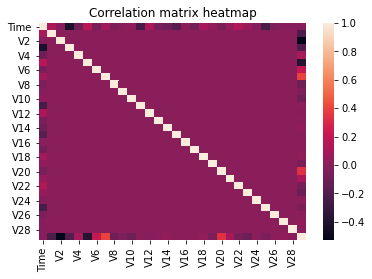

In [15]:
sns.heatmap(dataX.corr())
plt.title('Correlation matrix heatmap')
plt.savefig(CONFIG.reports / 'figures' / 'corr_heatmap.png')

###

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes / len(data)

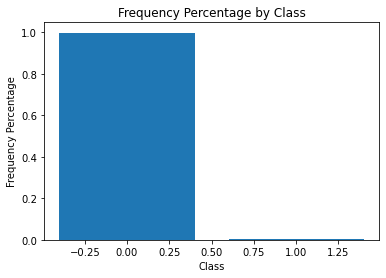

In [31]:
plt.bar(count_classes.index, tuple(count_classes/len(data)))
plt.title('Frequency Percentage by Class')
plt.xlabel('Class')
plt.ylabel('Frequency Percentage')
plt.savefig(CONFIG.reports / 'figures' / 'targetDistribution.png')